# Göğüs Kanseri Sınıflandırması
- Yazar: Bora Dere
- Son güncelleme: 12/02/2024
- İletişim: boradere@hotmail.com.tr

## 1- Veriyi Araştırma

### 1.1- Importlar ve Veri Setinin Yüklenmesi

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

X['index'] = X.index
y['index'] = y.index

df = pd.merge(X, y, on=['index'])
df.drop('index', inplace=True, axis=1)

df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


### 1.2- Veri Hakkında Genel Bilgi

Bu veri, Dr. William Wolberg'in 2.5 seneyi biraz aşkın klinik çalışmaları sonucu bir araya gelmiştir. Senede 2-3 defa güncellenen bu veri 15 Temmuz 1992'de çalışmalarda kullanılması için bağışlanmış olup güncellenme geçmişi şu şekildedir:

- Grup 1: 367 veri (Ocak 1989)
- Grup 2:  70 veri (Ekim 1989)
- Grup 3:  31 veri (Şubat 1990)
- Grup 4:  17 veri (Nisan 1990)
- Grup 5:  48 veri (Ağustos 1990)
- Grup 6:  49 veri (Güncellendi: Ocak 1991)
- Grup 7:  31 veri (Temmuz 1991)
- Grup 8:  86 veri (Kasım 1991)

Dr. Wolberg'in kendi tahlilleri üzerine dayandığı için güvenilir bir veri olarak değerlendiriliyor. 2010'dan 2019'a kadar alıntılanmış olması da genel olarak güvenilir olduğunun bir göstergesi olarak sayılabilir. 

## 2- EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [4]:
(df.isnull().sum()/len(df))*100

Clump_thickness                0.000000
Uniformity_of_cell_size        0.000000
Uniformity_of_cell_shape       0.000000
Marginal_adhesion              0.000000
Single_epithelial_cell_size    0.000000
Bare_nuclei                    2.288984
Bland_chromatin                0.000000
Normal_nucleoli                0.000000
Mitoses                        0.000000
Class                          0.000000
dtype: float64

NaN değerleri droplamak veya doldurmaya çalışmak gibi seçeneklerimiz var. İkisini de yapacağımızı düşünerek iki farklı veri oluşturuyoruz.

In [5]:
df_na_dropped = df.dropna()
df_na_dropped

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


Şimdi asıl verinin dağılımını inceleyebiliriz.

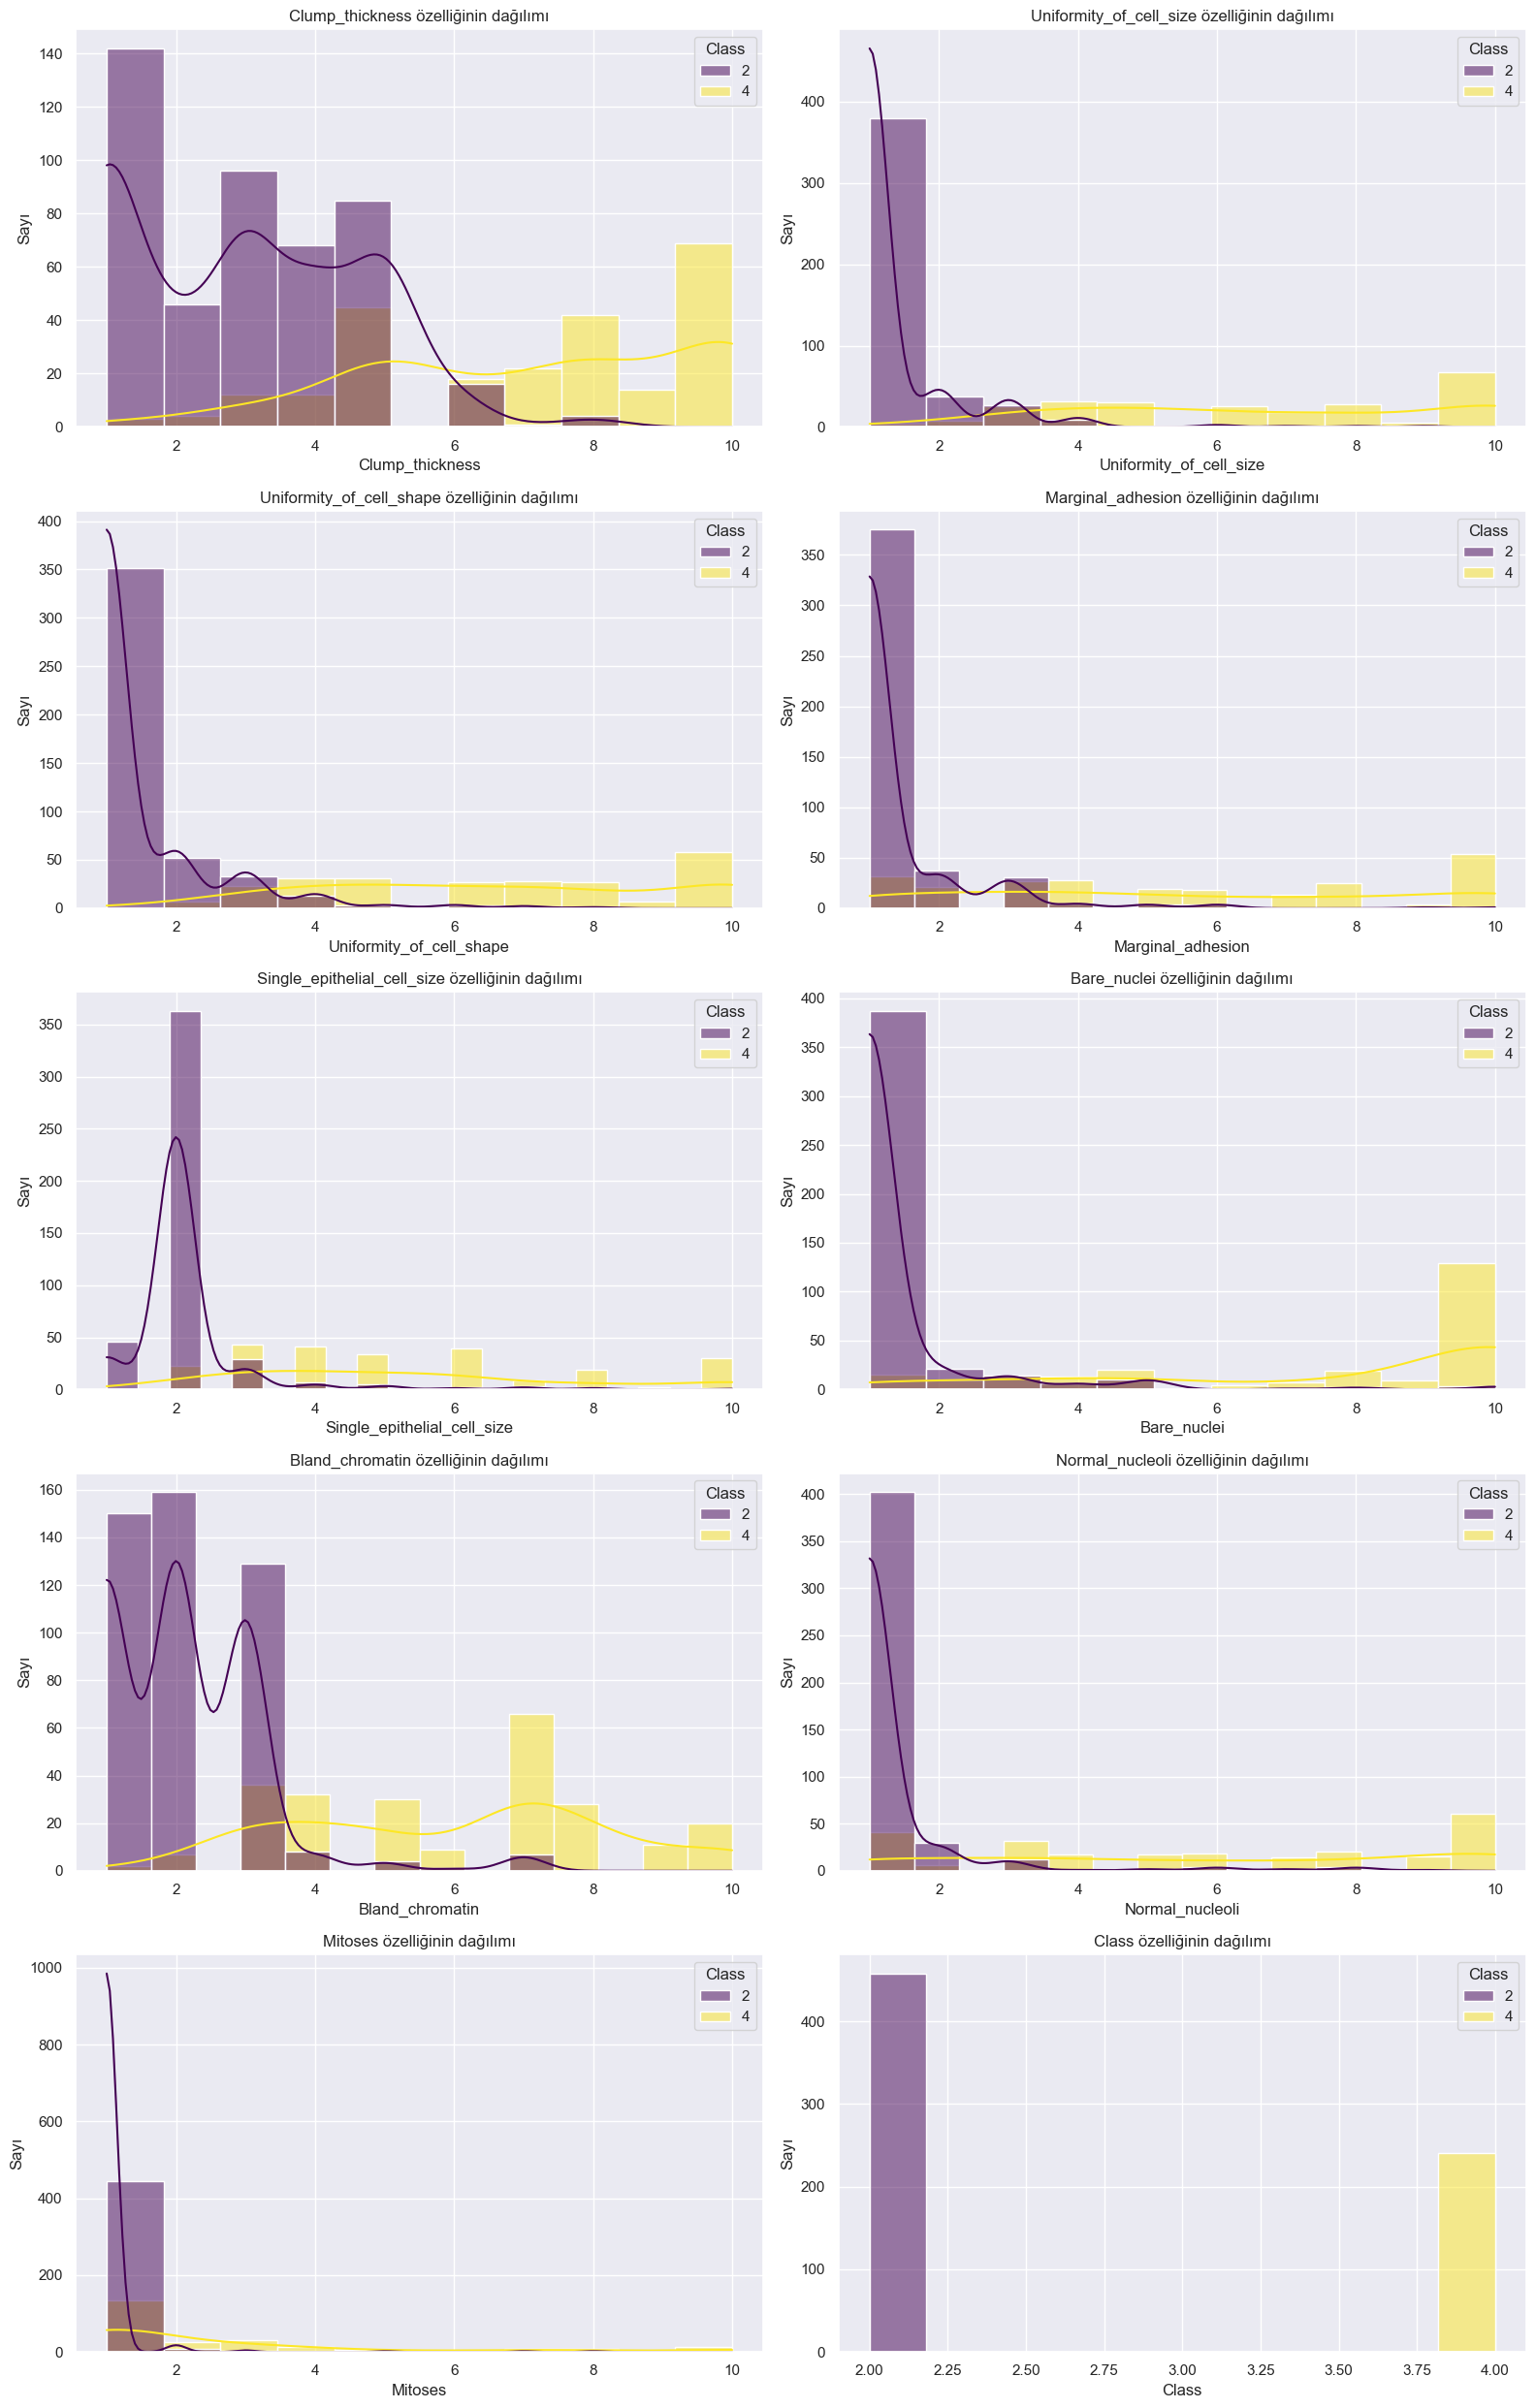

In [6]:
plt.figure(figsize=(16, 25))

for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=df, x=col, palette='viridis', kde=True, hue='Class')
    plt.ylabel('Sayı')
    plt.title(f"{col} özelliğinin dağılımı")

plt.tight_layout()

Hue kullanarak özelliklerin arasındaki korelasyon hakkında çok ufak da olsa ön bilgi edinebiliyoruz. Misal Clump_thickness ile malignancy arasında doğru orantı var gibi görünüyor. Aklımızın bir köşesinde dursun.

Şimdi, outlierlarla ilgili sadece ön bilgi edinmek için özellikleri boxplotlara yerleştireceğiz.

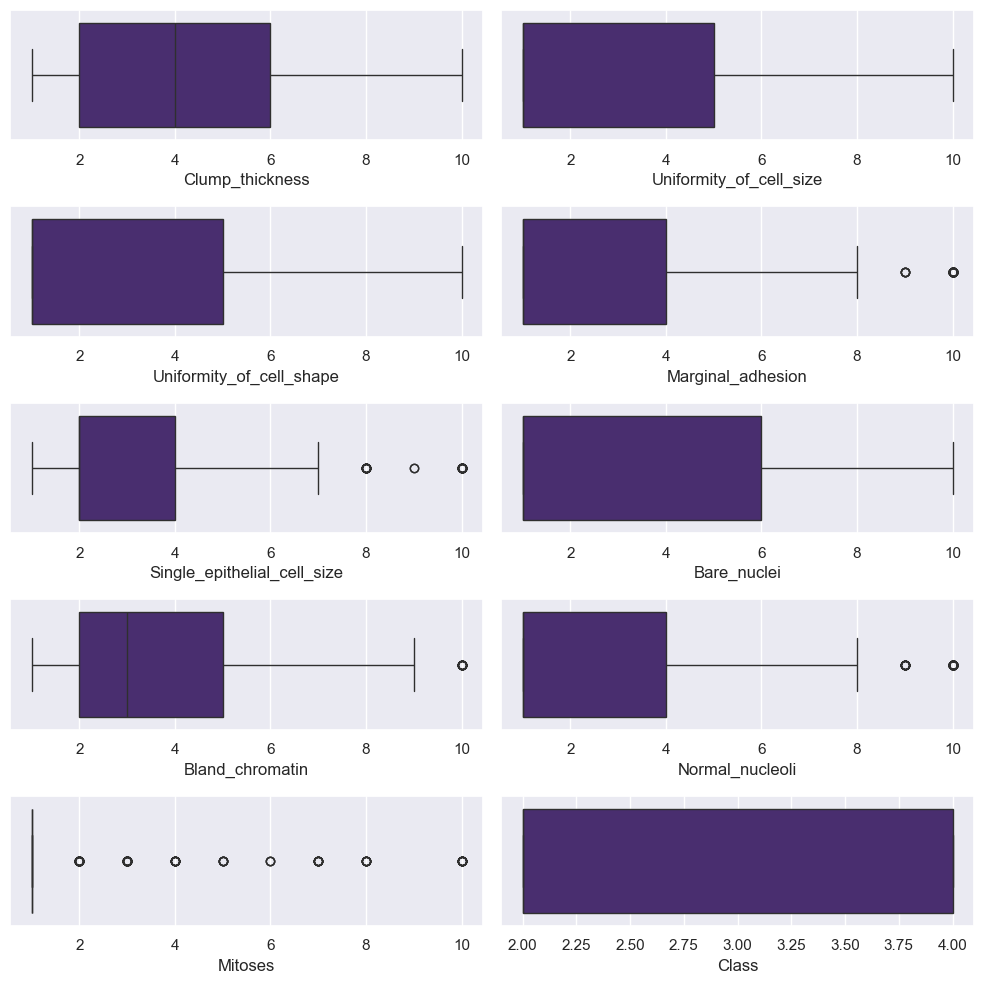

In [7]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df, x=col, color='#482677FF', saturation=.8)

plt.tight_layout()

Mitoses özelliği pek iç açıcı görünmüyor. Önceki plotta da verinin genelinin 1 olduğu görülüyordu, en başta kullandığımız verinin istatistiksel özeti de buna işaret ediyordu. Verideki hiçbir değer 0 veya negatif olmadığı için veriye gönül rahatlığıyla log transformation uygulayabiliriz. Bu, bizi çok fazla outlierla uğraşmaktan kurtaracaktır ve özelliklerin asimetrisini bir miktar düzeltecektir.

In [8]:
log_data = np.log(df)
log_data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.000000,0.693147
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.000000,0.693147
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.000000,0.693147
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0.693147
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,0.693147,1.386294
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.000000,1.386294


Bir daha inceleyelim.

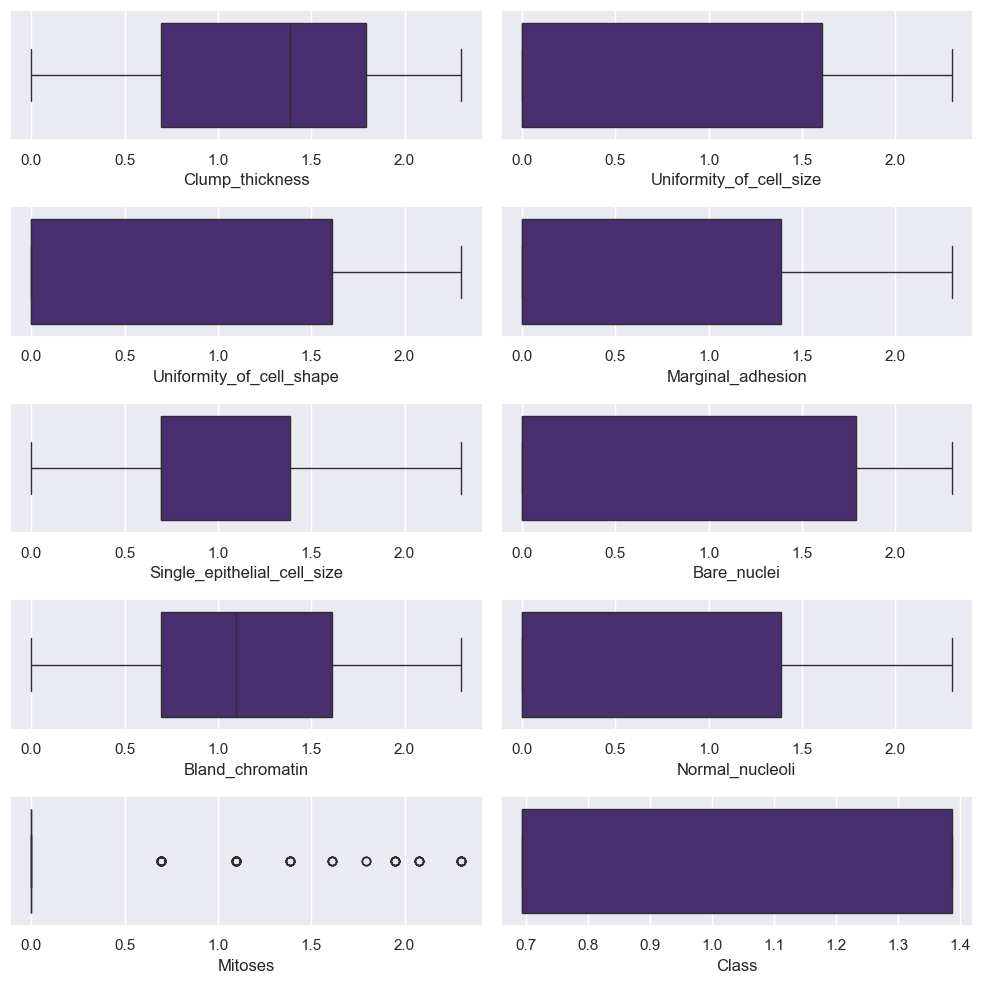

In [9]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=log_data, x=col, color='#482677FF', saturation=.8)

plt.tight_layout()

Verinin genelinde bir miktar işe yaramışa benziyor. Dolayısıyla aynısını NaN değerlerin atıldığı sete de yapıyoruz.

In [10]:
log_na_dropped = np.log(df_na_dropped)
log_na_dropped

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.000000,0.693147
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.000000,0.693147
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.000000,0.693147
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0.693147
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,0.693147,1.386294
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.000000,1.386294


Class özelliği başta 2 ve 4 olarak kodlandığı için şu anda anlamsız duruyor. 0 ve 1 olarak kodluyoruz.

In [11]:
def f(i): return 0 if i < 1 else 1

log_data['Class'] = log_data['Class'].map(f)
log_na_dropped['Class'] = log_na_dropped['Class'].map(f)

display(log_data)
display(log_na_dropped)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.000000,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.000000,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.000000,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,0.693147,1
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.000000,1


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.000000,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.000000,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.000000,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,0.693147,1
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.000000,1


Şimdi özellikler arasındaki korelasyonları biraz daha inceleyelim.

<AxesSubplot: >

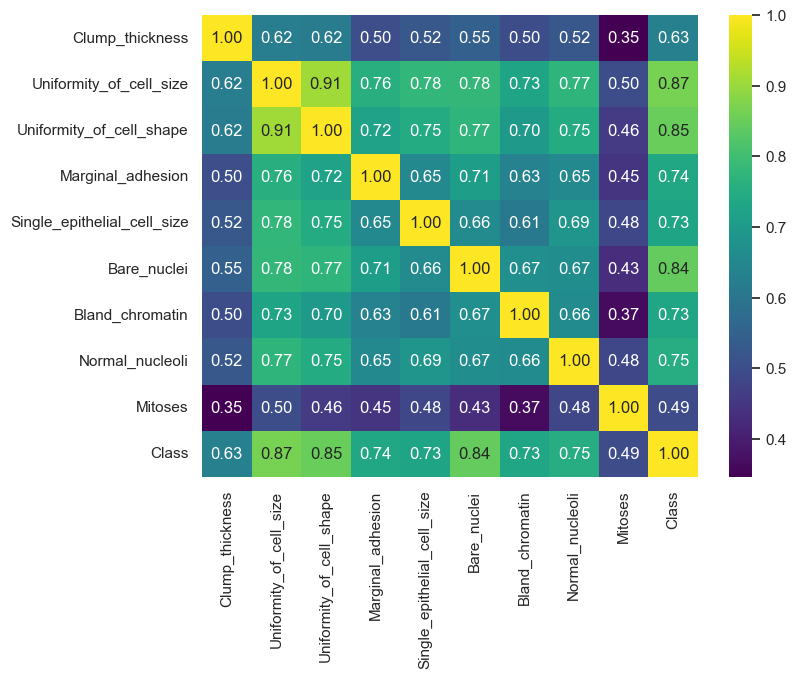

In [12]:
plt.figure(figsize=(8, 6))

corr = log_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='viridis')

İncelediğimizde birkaçı dışında genel olarak çoğu ilişkinin güçlü olduğunu görüyoruz. Bu da özelliklerden pek fazla temizlik yapmamızın gerekli olmayacağına dair inancımızı artırıyor. Şimdi outlier kontrolü yapalım.

In [13]:
def outlier_finder(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    inner_lower_fence = Q1 - 1.5*IQR
    inner_upper_fence = Q3 + 1.5*IQR

    outer_lower_fence = Q1 - 3*IQR
    outer_upper_fence = Q3 + 3*IQR

    mild_outliers = [i for i in data if (i < inner_lower_fence and i > outer_lower_fence) or (i > inner_upper_fence and i < outer_upper_fence)]
    extreme_outliers = [i for i in data if i < outer_lower_fence or i > outer_upper_fence]

    return mild_outliers, extreme_outliers


def outlier_printer(outliers, feature):
    mild_outliers = outliers[0]
    extreme_outliers = outliers[1]
    
    if len(mild_outliers) != 0:
        o1 = f"{feature} özelliğinde {len(mild_outliers)} mild outlier var."
        o2 = f"{mild_outliers[0]}, {feature} özelliği için bir mild outlier."

        print(o1)
        print("-"*len(o1 if len(o1) > len(o2) else o2))
        
        for i in mild_outliers:
            print(f"{i}, {feature} özelliği için bir mild outlier.")

        print()

    if len(extreme_outliers) != 0:
        o1 = f"{feature} özelliğinde {len(extreme_outliers)} extreme outlier var."
        o2 = f"{extreme_outliers[0]}, {feature} özelliği için bir extreme outlier."

        print(o1)
        print("-"*len(o1 if len(o1) > len(o2) else o2))
        
        for i in extreme_outliers:
            print(f"{i}, {feature} özelliği için bir extreme outlier.")

In [14]:
outliers_d = {}

for column in log_data.columns:
    print(f"{column} kolonundaki outlierlar:")
    print("-"*len(f"{column} kolonundaki outlierlar:"))
    outliers = outlier_finder(log_data[column])
    outlier_printer(outliers, column)
    outliers_d[column] = outliers
    if column != log_data.columns[-1]:
        print("\n")

Clump_thickness kolonundaki outlierlar:
---------------------------------------


Uniformity_of_cell_size kolonundaki outlierlar:
-----------------------------------------------


Uniformity_of_cell_shape kolonundaki outlierlar:
------------------------------------------------


Marginal_adhesion kolonundaki outlierlar:
-----------------------------------------


Single_epithelial_cell_size kolonundaki outlierlar:
---------------------------------------------------


Bare_nuclei kolonundaki outlierlar:
-----------------------------------


Bland_chromatin kolonundaki outlierlar:
---------------------------------------


Normal_nucleoli kolonundaki outlierlar:
---------------------------------------


Mitoses kolonundaki outlierlar:
-------------------------------
Mitoses özelliğinde 120 extreme outlier var.
--------------------------------------------------------------
1.6094379124341003, Mitoses özelliği için bir extreme outlier.
1.3862943611198906, Mitoses özelliği için bir extreme o

In [15]:
outliers_d_no_na = {}

for column in log_na_dropped.columns:
    print(f"{column} kolonundaki outlierlar:")
    print("-"*len(f"{column} kolonundaki outlierlar:"))
    outliers = outlier_finder(log_na_dropped[column])
    outlier_printer(outliers, column)
    outliers_d_no_na[column] = outliers
    if column != log_na_dropped.columns[-1]:
        print("\n")

Clump_thickness kolonundaki outlierlar:
---------------------------------------


Uniformity_of_cell_size kolonundaki outlierlar:
-----------------------------------------------


Uniformity_of_cell_shape kolonundaki outlierlar:
------------------------------------------------


Marginal_adhesion kolonundaki outlierlar:
-----------------------------------------


Single_epithelial_cell_size kolonundaki outlierlar:
---------------------------------------------------


Bare_nuclei kolonundaki outlierlar:
-----------------------------------


Bland_chromatin kolonundaki outlierlar:
---------------------------------------


Normal_nucleoli kolonundaki outlierlar:
---------------------------------------


Mitoses kolonundaki outlierlar:
-------------------------------
Mitoses özelliğinde 120 extreme outlier var.
--------------------------------------------------------------
1.6094379124341003, Mitoses özelliği için bir extreme outlier.
1.3862943611198906, Mitoses özelliği için bir extreme o

Tahmin ettiğimiz ve boxplotlardan da gördüğümüz üzere Mitoses özelliği dışında bir sorun görünmüyor. Outlierları attığımız, atmadığımız ve NaN ile değiştirip yerine impute yaptığımız 3 ayrı kategoride setler oluşturacağız ve hepsini detaylıca tüm modeller için deneyeceğiz.

In [16]:
with_outliers = log_data.copy()
with_outliers_na_dropped = log_na_dropped.copy()

In [17]:
no_outliers = log_data.copy()

for key, value in outliers_d.items():
    no_outliers = no_outliers[~no_outliers[key].isin(value[1])]
    no_outliers = no_outliers[~no_outliers[key].isin(value[0])]

no_outliers_na_dropped = log_na_dropped.copy()

for key, value in outliers_d_no_na.items():
    no_outliers_na_dropped = no_outliers_na_dropped[~no_outliers_na_dropped[key].isin(value[1])]
    no_outliers_na_dropped = no_outliers_na_dropped[~no_outliers_na_dropped[key].isin(value[0])]

display(no_outliers)
display(no_outliers_na_dropped)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.0,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.0,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.0,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.0,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
692,1.098612,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.0,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.0,1


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.0,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.0,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.0,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.0,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
692,1.098612,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.0,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.0,1


In [18]:
nan_outliers = log_data.copy()

for key, values in outliers_d.items():
    for value in values:
        nan_outliers[key] = nan_outliers[key].replace(value, np.nan)

nan_outliers_na_dropped = log_na_dropped.copy()

for key, values in outliers_d_no_na.items():
    for value in values:
        nan_outliers_na_dropped[key] = nan_outliers_na_dropped[key].replace(value, np.nan)

display(nan_outliers)
display(nan_outliers_na_dropped)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.0,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.0,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.0,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.0,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.0,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,NaN,1
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.0,1


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1.609438,0.000000,0.000000,0.000000,0.693147,0.000000,1.098612,0.000000,0.0,0
1,1.609438,1.386294,1.386294,1.609438,1.945910,2.302585,1.098612,0.693147,0.0,0
2,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.000000,0.0,0
3,1.791759,2.079442,2.079442,0.000000,1.098612,1.386294,1.098612,1.945910,0.0,0
4,1.386294,0.000000,0.000000,1.098612,0.693147,0.000000,1.098612,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
694,1.098612,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.0,0
695,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0
696,1.609438,2.302585,2.302585,1.098612,1.945910,1.098612,2.079442,2.302585,NaN,1
697,1.386294,2.079442,1.791759,1.386294,1.098612,1.386294,2.302585,1.791759,0.0,1


## 3- Modellerin Kıyaslanması

Her modeli sırayla kıyaslayacağız. NaN değerleri doldurmak için KNNImputer kullanmayı düşündüğüm için her modeli kendi ayrı bölümünde denemek, her model için optimize k değerini bulmak için de faydalı olacaktır.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# knnimpute
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(
    with_outliers.drop('Class', axis=1),
    with_outliers['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

# no knnimpute
X_train_with_outliers_na_dropped, X_test_with_outliers_na_dropped, y_train_with_outliers_na_dropped, y_test_with_outliers_na_dropped = train_test_split(
    with_outliers_na_dropped.drop('Class', axis=1),
    with_outliers_na_dropped['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

In [21]:
# knnimpute
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    no_outliers.drop('Class', axis=1),
    no_outliers['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

# no knnimpute
X_train_no_outliers_na_dropped, X_test_no_outliers_na_dropped, y_train_no_outliers_na_dropped, y_test_no_outliers_na_dropped = train_test_split(
    no_outliers_na_dropped.drop('Class', axis=1),
    no_outliers_na_dropped['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

In [22]:
# knnimpute
X_train_nan_outliers, X_test_nan_outliers, y_train_nan_outliers, y_test_nan_outliers = train_test_split(
    nan_outliers.drop('Class', axis=1),
    nan_outliers['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

# knnimpute
X_train_nan_outliers_na_dropped, X_test_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped, y_test_nan_outliers_na_dropped = train_test_split(
    nan_outliers_na_dropped.drop('Class', axis=1),
    nan_outliers_na_dropped['Class'],
    test_size=.2,
    random_state=42,
    shuffle=True
)

In [23]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [24]:
d_with_outliers = {}
d_with_outliers_na_dropped = {}
d_no_outliers = {}
d_no_outliers_na_dropped = {}
d_nan_outliers = {}
d_nan_outliers_na_dropped = {}

### 3.1- XGBoost Classification

In [25]:
from xgboost import XGBClassifier

#### 3.1.1- XGBoost Classification with_outliers

In [26]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 9


In [27]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 2


In [28]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.5}


In [29]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = xgb.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.14285714285714%
Precision: 95.55555555555556%
Recall: 95.55555555555556%
ROC AUC: 96.72514619883043%


#### 3.1.2- XGBoost Classification with_outliers_na_dropped

In [30]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.7}


In [31]:
xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = xgb.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.62043795620438%
Precision: 98.14814814814815%
Recall: 91.37931034482759%
ROC AUC: 95.05674378000873%


#### 3.1.3- XGBoost Classification no_outliers

In [32]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 7


In [33]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [34]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
En iyi parametreler: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 1.0}


In [35]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = xgb.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.41379310344827%
Precision: 95.83333333333334%
Recall: 92.0%
ROC AUC: 95.45054945054945%


#### 3.1.4- XGBoost Classification no_outliers_na_dropped

In [36]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 1.0}


In [37]:
xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = xgb.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.34513274336283%
Precision: 100.0%
Recall: 88.46153846153845%
ROC AUC: 94.23076923076923%


#### 3.1.5- XGBoost Classification nan_outliers

In [38]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 2


In [39]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 2


In [40]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.5}


In [41]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = xgb.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 96.42857142857143%
Precision: 95.45454545454545%
Recall: 93.33333333333333%
ROC AUC: 95.6140350877193%


#### 3.1.6- XGBoost Classification nan_outliers_na_dropped

In [42]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [43]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = XGBClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [44]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

model = XGBClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.7}


In [45]:
X_train_nan_outliers_na_dropped = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers_na_dropped)
X_test_nan_outliers_na_dropped = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers_na_dropped)

xgb = XGBClassifier(random_state=42, **grid.best_params_)
xgb.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = xgb.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['XGB'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.62043795620438%
Precision: 98.14814814814815%
Recall: 91.37931034482759%
ROC AUC: 95.05674378000873%


### 3.2- Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

#### 3.2.1- Logistic Regression with_outliers

In [47]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [48]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [49]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr']
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = lr.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.85714285714285%
Precision: 95.65217391304348%
Recall: 97.77777777777777%
ROC AUC: 97.83625730994152%


#### 3.2.2- Logistic Regression with_outliers_na_dropped

In [51]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr'],
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 10, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [52]:
lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = lr.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.08029197080292%
Precision: 98.21428571428571%
Recall: 94.82758620689656%
ROC AUC: 96.78088171104322%


#### 3.2.3- Logistic Regression no_outliers

In [53]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [54]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [55]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr'],
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


In [56]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = lr.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.41379310344827%
Precision: 95.83333333333334%
Recall: 92.0%
ROC AUC: 95.45054945054945%


#### 3.2.4- Logistic Regression no_outliers_na_dropped

In [57]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr'],
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [58]:
lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = lr.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.57522123893806%
Precision: 100.0%
Recall: 80.76923076923077%
ROC AUC: 90.38461538461539%


#### 3.2.5- Logistic Regression nan_outliers

In [59]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [60]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [61]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr'],
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


In [62]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = lr.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.71428571428572%
Precision: 95.34883720930233%
Recall: 91.11111111111111%
ROC AUC: 94.50292397660819%


#### 3.2.6- Logistic Regression nan_outliers_na_dropped

In [63]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [64]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = LogisticRegression(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [65]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 300, 500],
    'multi_class': ['ovr'],
}

model = LogisticRegression(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'C': 0.1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [66]:
lr = LogisticRegression(random_state=42, **grid.best_params_)
lr.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = lr.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['LR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 94.8905109489051%
Precision: 96.36363636363636%
Recall: 91.37931034482759%
ROC AUC: 94.42383238760367%


### 3.3- Random Forest Classification

In [67]:
from sklearn.ensemble import RandomForestClassifier

#### 3.3.1- Random Forest Classification with_outliers

In [68]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [69]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [70]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
En iyi parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [71]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = rfr.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.14285714285714%
Precision: 95.55555555555556%
Recall: 95.55555555555556%
ROC AUC: 96.72514619883043%


#### 3.3.2- Random Forest Classification with_outliers_na_dropped

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
En iyi parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [73]:
rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = rfr.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 94.8905109489051%
Precision: 96.36363636363636%
Recall: 91.37931034482759%
ROC AUC: 94.42383238760367%


#### 3.3.3- Random Forest Classification no_outliers

In [74]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [75]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [76]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
En iyi parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [77]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = rfr.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.41379310344827%
Precision: 95.83333333333334%
Recall: 92.0%
ROC AUC: 95.45054945054945%


#### 3.3.4- Random Forest Classification no_outliers_na_dropped

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


En iyi parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = rfr.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 96.46017699115043%
Precision: 95.83333333333334%
Recall: 88.46153846153845%
ROC AUC: 93.65605658709107%


#### 3.3.5- Random Forest Classification nan_outliers

In [80]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [81]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [82]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
En iyi parametreler: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [83]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = rfr.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.0%
Precision: 93.18181818181817%
Recall: 91.11111111111111%
ROC AUC: 93.9766081871345%


#### 3.2.6- Random Forest Classification nan_outliers_na_dropped

In [84]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [85]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [86]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
En iyi parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [87]:
rfr = RandomForestClassifier(random_state=42, **grid.best_params_)
rfr.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = rfr.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['RFR'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 96.35036496350365%
Precision: 98.18181818181819%
Recall: 93.10344827586206%
ROC AUC: 95.91881274552597%


### 3.4- Support Vector Classification

In [88]:
from sklearn.svm import SVC

#### 3.4.1- Support Vector Classification with_outliers

In [89]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [90]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [91]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}


In [92]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = svc.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.85714285714285%
Precision: 95.65217391304348%
Recall: 97.77777777777777%
ROC AUC: 97.83625730994152%


#### 3.4.2- Support Vector Classification with_outliers_na_dropped

In [93]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [94]:
svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = svc.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 98.54014598540147%
Precision: 98.27586206896551%
Recall: 98.27586206896551%
ROC AUC: 98.50501964207771%


#### 3.4.3- Support Vector Classification no_outliers

In [95]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [96]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [97]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [98]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = svc.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 98.27586206896551%
Precision: 92.5925925925926%
Recall: 100.0%
ROC AUC: 98.90109890109889%


#### 3.4.4- Support Vector Classification no_outliers_na_dropped

In [99]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [100]:
svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = svc.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.34513274336283%
Precision: 96.0%
Recall: 92.3076923076923%
ROC AUC: 95.57913351016799%


#### 3.4.5- Support Vector Classification nan_outliers

In [101]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [102]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [103]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}


In [104]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = svc.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.85714285714285%
Precision: 95.65217391304348%
Recall: 97.77777777777777%
ROC AUC: 97.83625730994152%


#### 3.4.6- Support Vector Classification nan_outliers_na_dropped

In [105]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [106]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = SVC(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [107]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

model = SVC(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [108]:
svc = SVC(random_state=42, **grid.best_params_)
svc.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = svc.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['SVC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.08029197080292%
Precision: 98.21428571428571%
Recall: 94.82758620689656%
ROC AUC: 96.78088171104322%


### 3.5- Neural Network Classification

In [109]:
from sklearn.neural_network import MLPClassifier

#### 3.5.1- Neural Network Classification with_outliers

In [110]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [111]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [112]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'max_iter': 300, 'solver': 'sgd'}


In [113]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = mlpc.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 93.57142857142857%
Precision: 95.0%
Recall: 84.44444444444444%
ROC AUC: 91.16959064327486%


#### 3.5.2- Neural Network Classification with_outliers_na_dropped

In [114]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


In [115]:
mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = mlpc.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 94.8905109489051%
Precision: 96.36363636363636%
Recall: 91.37931034482759%
ROC AUC: 94.42383238760367%


#### 3.5.3- Neural Network Classification no_outliers

In [116]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [117]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [118]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 1.0, 'max_iter': 100, 'solver': 'sgd'}


In [119]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = mlpc.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 98.27586206896551%
Precision: 92.5925925925926%
Recall: 100.0%
ROC AUC: 98.90109890109889%


#### 3.5.4- Neural Network Classification no_outliers_na_dropped

In [120]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd'}


In [121]:
mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = mlpc.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.34513274336283%
Precision: 100.0%
Recall: 88.46153846153845%
ROC AUC: 94.23076923076923%


#### 3.5.5- Support Vector Classification nan_outliers

In [122]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [123]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [124]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}


In [125]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = mlpc.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.71428571428572%
Precision: 95.34883720930233%
Recall: 91.11111111111111%
ROC AUC: 94.50292397660819%


#### 3.5.6- Support Vector Classification nan_outliers_na_dropped

In [126]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [127]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = MLPClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [128]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 200, 300, 400, 500]
}

model = MLPClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
En iyi parametreler: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


In [129]:
mlpc = MLPClassifier(random_state=42, **grid.best_params_)
mlpc.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = mlpc.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['MLPC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 94.8905109489051%
Precision: 96.36363636363636%
Recall: 91.37931034482759%
ROC AUC: 94.42383238760367%


### 3.6- Gradient Boosting Classification

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

#### 3.6.1- Gradient Boosting Classification with_outliers

In [131]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_with_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [132]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_with_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_with_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [133]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers, y_train_with_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}


In [134]:
X_train_with_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_with_outliers)
X_test_with_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_with_outliers)

gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_with_outliers, y_train_with_outliers)

y_pred = gbc.predict(X_test_with_outliers)

accuracy = accuracy_score(y_test_with_outliers, y_pred)
precision = precision_score(y_test_with_outliers, y_pred)
recall = recall_score(y_test_with_outliers, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.71428571428572%
Precision: 95.34883720930233%
Recall: 91.11111111111111%
ROC AUC: 94.50292397660819%


#### 3.6.2- Gradient Boosting Classification with_outliers_na_dropped

In [135]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [136]:
gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_with_outliers_na_dropped, y_train_with_outliers_na_dropped)

y_pred = gbc.predict(X_test_with_outliers_na_dropped)

accuracy = accuracy_score(y_test_with_outliers_na_dropped, y_pred)
precision = precision_score(y_test_with_outliers_na_dropped, y_pred)
recall = recall_score(y_test_with_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_with_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_with_outliers_na_dropped['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 94.8905109489051%
Precision: 96.36363636363636%
Recall: 91.37931034482759%
ROC AUC: 94.42383238760367%


#### 3.6.3- Gradient Boost Classification no_outliers

In [137]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_no_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [138]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_no_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_no_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [139]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers, y_train_no_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}


In [140]:
X_train_no_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_no_outliers)
X_test_no_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_no_outliers)

gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_no_outliers, y_train_no_outliers)

y_pred = gbc.predict(X_test_no_outliers)

accuracy = accuracy_score(y_test_no_outliers, y_pred)
precision = precision_score(y_test_no_outliers, y_pred)
recall = recall_score(y_test_no_outliers, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 96.55172413793103%
Precision: 92.0%
Recall: 92.0%
ROC AUC: 94.9010989010989%


#### 3.6.4- Neural Network Classification no_outliers_na_dropped

In [141]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}


In [142]:
gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_no_outliers_na_dropped, y_train_no_outliers_na_dropped)

y_pred = gbc.predict(X_test_no_outliers_na_dropped)

accuracy = accuracy_score(y_test_no_outliers_na_dropped, y_pred)
precision = precision_score(y_test_no_outliers_na_dropped, y_pred)
recall = recall_score(y_test_no_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_no_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_no_outliers_na_dropped['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.57522123893806%
Precision: 92.0%
Recall: 88.46153846153845%
ROC AUC: 93.0813439434129%


#### 3.6.5- Support Vector Classification nan_outliers

In [143]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [144]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [145]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers, y_train_nan_outliers)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}


In [146]:
X_train_nan_outliers = KNNImputer(n_neighbors=best_k_train).fit_transform(X_train_nan_outliers)
X_test_nan_outliers = KNNImputer(n_neighbors=best_k_test).fit_transform(X_test_nan_outliers)

gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_nan_outliers, y_train_nan_outliers)

y_pred = gbc.predict(X_test_nan_outliers)

accuracy = accuracy_score(y_test_nan_outliers, y_pred)
precision = precision_score(y_test_nan_outliers, y_pred)
recall = recall_score(y_test_nan_outliers, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 95.71428571428572%
Precision: 95.34883720930233%
Recall: 91.11111111111111%
ROC AUC: 94.50292397660819%


#### 3.6.6- Support Vector Classification nan_outliers_na_dropped

In [147]:
best_score = -np.inf
best_k_train = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_train_nan_outliers_na_dropped)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_train_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_train = k

print(f"En iyi k değeri: {best_k_train}")

En iyi k değeri: 1


In [148]:
best_score = -np.inf
best_k_test = 1

for k in range(1, 21):
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X_test_nan_outliers_na_dropped)

    model = GradientBoostingClassifier(random_state=42)
    scores = cross_val_score(model, X_imputed, y_test_nan_outliers_na_dropped, cv=5)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_k_test = k

print(f"En iyi k değeri: {best_k_test}")

En iyi k değeri: 1


In [149]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

print(f"En iyi parametreler: {grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
En iyi parametreler: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}


In [150]:
gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)
gbc.fit(X_train_nan_outliers_na_dropped, y_train_nan_outliers_na_dropped)

y_pred = gbc.predict(X_test_nan_outliers_na_dropped)

accuracy = accuracy_score(y_test_nan_outliers_na_dropped, y_pred)
precision = precision_score(y_test_nan_outliers_na_dropped, y_pred)
recall = recall_score(y_test_nan_outliers_na_dropped, y_pred)
roc_auc = roc_auc_score(y_test_nan_outliers_na_dropped, y_pred)

print(f"Accuracy: {accuracy * 100.0}%")
print(f"Precision: {precision * 100.0}%")
print(f"Recall: {recall * 100.0}%")
print(f"ROC AUC: {roc_auc * 100.0}%")

d_nan_outliers_na_dropped['GBC'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}

Accuracy: 97.08029197080292%
Precision: 98.21428571428571%
Recall: 94.82758620689656%
ROC AUC: 96.78088171104322%


Şimdi tüm veri kombinasyonları için en iyi değerlere bakalım.

In [158]:
abbs = ['with_outliers', 'with_outliers_na_dropped', 'no_outliers', 'no_outliers_na_dropped', 'nan_outliers', 'nan_outliers_na_dropped']
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']

for abb in abbs:
    d = globals()['d_' + abb]
    print(f"{abb} verisi için en iyi değerler:")
    print('-'*len(f"{abb} verisi için en iyi değerler:"))

    for metric in metrics:
        best_model = max(d, key=lambda x: d[x][metric])
        best_value = d[best_model][metric]
        print(f"En yüksek {metric}:\t\t{best_model} = {best_value}")
    
    print()

with_outliers verisi için en iyi değerler:
------------------------------------------
En yüksek Accuracy:		LR = 0.9785714285714285
En yüksek Precision:		LR = 0.9565217391304348
En yüksek Recall:		LR = 0.9777777777777777
En yüksek ROC AUC:		LR = 0.9783625730994152

with_outliers_na_dropped verisi için en iyi değerler:
-----------------------------------------------------
En yüksek Accuracy:		SVC = 0.9854014598540146
En yüksek Precision:		SVC = 0.9827586206896551
En yüksek Recall:		SVC = 0.9827586206896551
En yüksek ROC AUC:		SVC = 0.9850501964207771

no_outliers verisi için en iyi değerler:
----------------------------------------
En yüksek Accuracy:		SVC = 0.9827586206896551
En yüksek Precision:		XGB = 0.9583333333333334
En yüksek Recall:		SVC = 1.0
En yüksek ROC AUC:		SVC = 0.9890109890109889

no_outliers_na_dropped verisi için en iyi değerler:
---------------------------------------------------
En yüksek Accuracy:		XGB = 0.9734513274336283
En yüksek Precision:		XGB = 1.0
En yüksek Re

**with_outliers verisi için en iyi değerler:**
- En yüksek Accuracy:	LR = 0.9785714285714285
- En yüksek Precision:	LR = 0.9565217391304348
- En yüksek Recall:		LR = 0.9777777777777777
- En yüksek ROC AUC:	LR = 0.9783625730994152

**with_outliers_na_dropped verisi için en iyi değerler:**

- En yüksek Accuracy:	SVC = 0.9854014598540146
- En yüksek Precision:	SVC = 0.9827586206896551
- En yüksek Recall:		SVC = 0.9827586206896551
- En yüksek ROC AUC:	SVC = 0.9850501964207771

**no_outliers verisi için en iyi değerler:**

- En yüksek Accuracy:		SVC = 0.9827586206896551
- En yüksek Precision:	XGB = 0.9583333333333334
- En yüksek Recall:		SVC = 1.0
- En yüksek ROC AUC:		SVC = 0.9890109890109889

**no_outliers_na_dropped verisi için en iyi değerler:**

- En yüksek Accuracy:		XGB = 0.9734513274336283
- En yüksek Precision:	XGB = 1.0
- En yüksek Recall:		SVC = 0.9230769230769231
- En yüksek ROC AUC:		SVC = 0.9557913351016799

**nan_outliers verisi için en iyi değerler:**

- En yüksek Accuracy:		SVC = 0.9785714285714285
- En yüksek Precision:	SVC = 0.9565217391304348
- En yüksek Recall:		SVC = 0.9777777777777777
- En yüksek ROC AUC:		SVC = 0.9783625730994152

**nan_outliers_na_dropped verisi için en iyi değerler:**

- En yüksek Accuracy:		SVC = 0.9708029197080292
- En yüksek Precision:	SVC = 0.9821428571428571
- En yüksek Recall:		SVC = 0.9482758620689655
- En yüksek ROC AUC:		SVC = 0.9678088171104322

## Sonuç

Outlierları atmadığımız veride Logistic Regression en iyi sonuçları vermiş gibi görünüyor. NaN verileri impute etmek yerine dropladığımız durumda ise SVC ezici üstünlüğe sahip oluyor.

Outlierları attığımız veride SVC yine genel olarak üstünlüğü korumakla beraber olabilecek en iyi Recall değerine ulaşıyor. Tıbbi bir veriyle uğraşıp kişinin ilgili hastalığa sahip olup olmadığını belirlemeye çalıştığımız için mükemmel Recall değerine ulaşmak ilk hedeflerimizden olmalı. Bu veri için SVC olabilecek en iyi model gibi duruyor. Aynı veride NaN verileri dropladığımız zaman da SVC-XGB arasında gidip geliyoruz.

Outlierları NaN ile değiştirdiğimiz verilerde ise her durumda SVC modelinin en iyi performansı gösterdiğini görüyoruz. 

Genele baktığımızda da en iyi performansı SVC modeli ve no_outliers verisi ile aldığımız sonucuna varabiliriz.

Raporda doldurmak ve manuel karşılaştırma yapmak için tüm veriler için metrikleri görüntüleyelim:

In [159]:
for abb in abbs:
    display(globals()['d_' + abb])
    print()

{'XGB': {'Accuracy': 0.9714285714285714,
  'Precision': 0.9555555555555556,
  'Recall': 0.9555555555555556,
  'ROC AUC': 0.9672514619883043},
 'LR': {'Accuracy': 0.9785714285714285,
  'Precision': 0.9565217391304348,
  'Recall': 0.9777777777777777,
  'ROC AUC': 0.9783625730994152},
 'RFR': {'Accuracy': 0.9714285714285714,
  'Precision': 0.9555555555555556,
  'Recall': 0.9555555555555556,
  'ROC AUC': 0.9672514619883043},
 'SVC': {'Accuracy': 0.9785714285714285,
  'Precision': 0.9565217391304348,
  'Recall': 0.9777777777777777,
  'ROC AUC': 0.9783625730994152},
 'MLPC': {'Accuracy': 0.9357142857142857,
  'Precision': 0.95,
  'Recall': 0.8444444444444444,
  'ROC AUC': 0.9116959064327486},
 'GBC': {'Accuracy': 0.9571428571428572,
  'Precision': 0.9534883720930233,
  'Recall': 0.9111111111111111,
  'ROC AUC': 0.9450292397660819}}

{'XGB': {'Accuracy': 0.9562043795620438,
  'Precision': 0.9814814814814815,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9505674378000872},
 'LR': {'Accuracy': 0.9708029197080292,
  'Precision': 0.9821428571428571,
  'Recall': 0.9482758620689655,
  'ROC AUC': 0.9678088171104322},
 'RFR': {'Accuracy': 0.948905109489051,
  'Precision': 0.9636363636363636,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9442383238760367},
 'SVC': {'Accuracy': 0.9854014598540146,
  'Precision': 0.9827586206896551,
  'Recall': 0.9827586206896551,
  'ROC AUC': 0.9850501964207771},
 'MLPC': {'Accuracy': 0.948905109489051,
  'Precision': 0.9636363636363636,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9442383238760367},
 'GBC': {'Accuracy': 0.948905109489051,
  'Precision': 0.9636363636363636,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9442383238760367}}

{'XGB': {'Accuracy': 0.9741379310344828,
  'Precision': 0.9583333333333334,
  'Recall': 0.92,
  'ROC AUC': 0.9545054945054945},
 'LR': {'Accuracy': 0.9741379310344828,
  'Precision': 0.9583333333333334,
  'Recall': 0.92,
  'ROC AUC': 0.9545054945054945},
 'RFR': {'Accuracy': 0.9741379310344828,
  'Precision': 0.9583333333333334,
  'Recall': 0.92,
  'ROC AUC': 0.9545054945054945},
 'SVC': {'Accuracy': 0.9827586206896551,
  'Precision': 0.9259259259259259,
  'Recall': 1.0,
  'ROC AUC': 0.9890109890109889},
 'MLPC': {'Accuracy': 0.9827586206896551,
  'Precision': 0.9259259259259259,
  'Recall': 1.0,
  'ROC AUC': 0.9890109890109889},
 'GBC': {'Accuracy': 0.9655172413793104,
  'Precision': 0.92,
  'Recall': 0.92,
  'ROC AUC': 0.949010989010989}}

{'XGB': {'Accuracy': 0.9734513274336283,
  'Precision': 1.0,
  'Recall': 0.8846153846153846,
  'ROC AUC': 0.9423076923076923},
 'LR': {'Accuracy': 0.9557522123893806,
  'Precision': 1.0,
  'Recall': 0.8076923076923077,
  'ROC AUC': 0.9038461538461539},
 'RFR': {'Accuracy': 0.9646017699115044,
  'Precision': 0.9583333333333334,
  'Recall': 0.8846153846153846,
  'ROC AUC': 0.9365605658709107},
 'SVC': {'Accuracy': 0.9734513274336283,
  'Precision': 0.96,
  'Recall': 0.9230769230769231,
  'ROC AUC': 0.9557913351016799},
 'MLPC': {'Accuracy': 0.9734513274336283,
  'Precision': 1.0,
  'Recall': 0.8846153846153846,
  'ROC AUC': 0.9423076923076923},
 'GBC': {'Accuracy': 0.9557522123893806,
  'Precision': 0.92,
  'Recall': 0.8846153846153846,
  'ROC AUC': 0.9308134394341291}}

{'XGB': {'Accuracy': 0.9642857142857143,
  'Precision': 0.9545454545454546,
  'Recall': 0.9333333333333333,
  'ROC AUC': 0.956140350877193},
 'LR': {'Accuracy': 0.9571428571428572,
  'Precision': 0.9534883720930233,
  'Recall': 0.9111111111111111,
  'ROC AUC': 0.9450292397660819},
 'RFR': {'Accuracy': 0.95,
  'Precision': 0.9318181818181818,
  'Recall': 0.9111111111111111,
  'ROC AUC': 0.939766081871345},
 'SVC': {'Accuracy': 0.9785714285714285,
  'Precision': 0.9565217391304348,
  'Recall': 0.9777777777777777,
  'ROC AUC': 0.9783625730994152},
 'MLPC': {'Accuracy': 0.9571428571428572,
  'Precision': 0.9534883720930233,
  'Recall': 0.9111111111111111,
  'ROC AUC': 0.9450292397660819},
 'GBC': {'Accuracy': 0.9571428571428572,
  'Precision': 0.9534883720930233,
  'Recall': 0.9111111111111111,
  'ROC AUC': 0.9450292397660819}}

{'XGB': {'Accuracy': 0.9562043795620438,
  'Precision': 0.9814814814814815,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9505674378000872},
 'LR': {'Accuracy': 0.948905109489051,
  'Precision': 0.9636363636363636,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9442383238760367},
 'RFR': {'Accuracy': 0.9635036496350365,
  'Precision': 0.9818181818181818,
  'Recall': 0.9310344827586207,
  'ROC AUC': 0.9591881274552597},
 'SVC': {'Accuracy': 0.9708029197080292,
  'Precision': 0.9821428571428571,
  'Recall': 0.9482758620689655,
  'ROC AUC': 0.9678088171104322},
 'MLPC': {'Accuracy': 0.948905109489051,
  'Precision': 0.9636363636363636,
  'Recall': 0.9137931034482759,
  'ROC AUC': 0.9442383238760367},
 'GBC': {'Accuracy': 0.9708029197080292,
  'Precision': 0.9821428571428571,
  'Recall': 0.9482758620689655,
  'ROC AUC': 0.9678088171104322}}